In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv" )
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Merging the 12 months data

In [4]:
files = [file for file in  os.listdir("Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data")]

all_months_data = pd.DataFrame()
for file in files:
    data = pd.read_csv("Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+ file)
    data=data.dropna()
    all_months_data = pd.concat([all_months_data, data])
all_months_data.head()
all_months_data.to_csv("C:\\Users\\HomePC\\all_data.csv",index=False)
    

In [5]:
all_data=pd.read_csv("all_data.csv")

In [35]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
Hour                         int32
Minute                       int32
Count                        int64
dtype: object

In [9]:
all_data['Price Each'] 

# Remove rows with NaN values in the "Price Each" column
all_data = all_data.dropna(subset=['Price Each'])

#### AUGUMENTED DATA WITH ADDITIONAL COLUMNS

Adding the Month column

In [10]:
all_data["Month"]=all_data['Order Date'].str[0:2]
all_data = all_data[all_data['Month'].str.isdigit()]
all_data['Month']=all_data['Month'].astype('int32')


In [11]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Adding a Sales column

In [12]:
all_data["Quantity Ordered"]=pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"]=pd.to_numeric(all_data["Price Each"])


In [13]:
all_data['Sales']=all_data['Quantity Ordered']*all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Add a City Column 

In [14]:
# Let's Use apply()
def get_city(address):
    return address.split(",")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x))

# all_data=all_data.drop(columns='Column',inplace=True)
print(all_data.head())

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
1   176559  Bose SoundSport Headphones                 1       99.99   
2   176560                Google Phone                 1      600.00   
3   176560            Wired Headphones                 1       11.99   
4   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90   
1  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99   
2  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99   
4  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99   

           City  
0        Dallas  
1        Boston  
2   Los Angeles  
3   Los Angeles  
4   Los Angeles  


In [15]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


#### best month for sales/How much was earned that month

In [16]:
results=all_data.groupby("Month").sum()

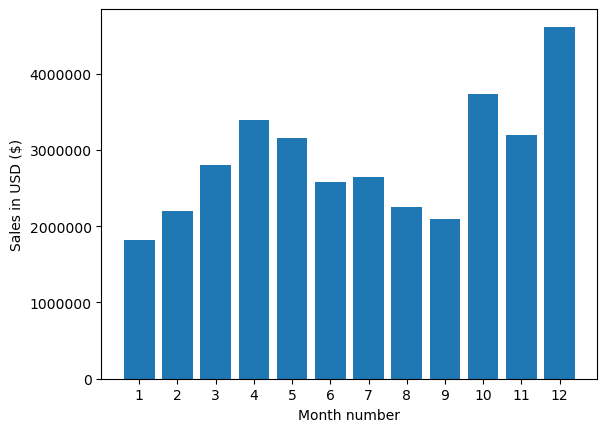

In [17]:
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month number")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

##### What City had the highest number of sales

In [18]:
results2=all_data.groupby("City").sum()
results2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
Austin,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
Boston,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
Dallas,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
Los Angeles,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80
New York City,1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43
Portland,1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,14053,2307747.47,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",87765,2320490.61
San Francisco,1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91
Seattle,1765631765681765881766121766241766541766631766...,Bose SoundSport HeadphonesLightning Charging C...,16553,2733296.01,04/02/19 07:4604/15/19 12:1804/02/19 04:0004/0...,"668 Center St, Seattle, WA 98101438 Elm St, Se...",104941,2747755.48


In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


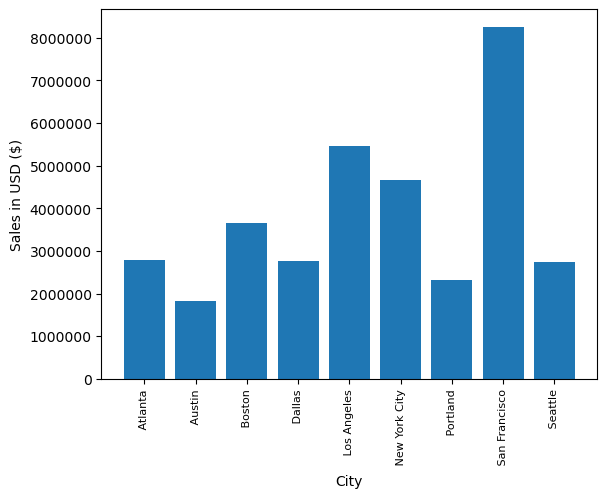

In [20]:
cities=[city for city ,df in all_data.groupby("City")]
plt.bar(cities,results2['Sales'])
plt.xticks(cities,rotation =90,size=8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City")
plt.ticklabel_format(style='plain', axis='y')
plt.show()


##### What time is the advertisement likely hood to airmore (have the most effect)


In [21]:
all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])

C:\Users\HomePC\AppData\Local\Temp\ipykernel_9500\425601281.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])


In [22]:
all_data["Hour"]=all_data["Order Date"].dt.hour
all_data["Minute"]=all_data["Order Date"].dt.minute
all_data["Count"]=1

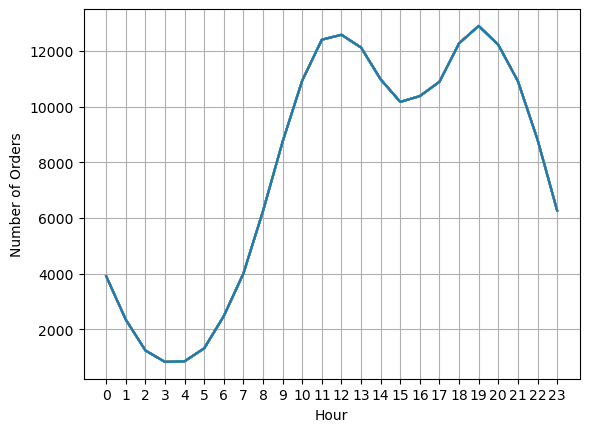

In [23]:
hours=[hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours,all_data.groupby(["Hour"]).count())
# all_data.groupby(["Hour"]).count()
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.xticks(hours)
plt.grid()
plt.show()





#### What products are most often sold together

In [24]:
df=all_data[all_data["Order ID"].duplicated(keep=False)]

df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x:",".join(x))


df=df[["Order ID","Grouped"]].drop_duplicates()

df.head()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_9500\1644035860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x:",".join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [25]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df["Grouped"]:
    row_list=row.split()
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key,value)

('Charging', 'Cable') 3041
('Phone,USB-C', 'Charging') 1348
('Phone,USB-C', 'Cable') 1171
('iPhone,Lightning', 'Charging') 1007
('Google', 'Charging') 999
('Google', 'Phone,USB-C') 984
('Batteries', '(4-pack)') 960
('iPhone,Lightning', 'Cable') 888
('Google', 'Cable') 871
('Airpods', 'Headphones') 732


###### What product sold the most and the reason behind it

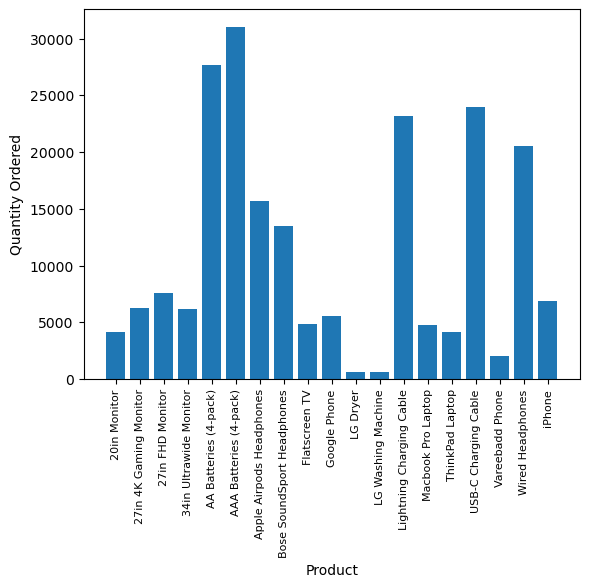

In [26]:
product_group = all_data.groupby("Product")
product_grouped=product_group[["Quantity Ordered","Price Each","Month","Sales","Hour","Minute","Count"]].sum()
quantity_ordered=product_grouped["Quantity Ordered"]
products = [product for product, df in product_group]
plt.bar(products,quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.xticks(products,rotation=90,size=8)
plt.show()

In [40]:
import pandas as pd

# Convert the "Price Each" column to numeric values, coercing errors to NaN
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Remove rows with NaN values in the "Price Each" column
all_data = all_data.dropna(subset=['Price Each'])

# Now you can perform the groupby operation again
prices = all_data.groupby("Product")["Price Each"].mean().reset_index()
print(prices)

                       Product  Price Each
0                 20in Monitor      109.99
1       27in 4K Gaming Monitor      389.99
2             27in FHD Monitor      149.99
3       34in Ultrawide Monitor      379.99
4        AA Batteries (4-pack)        3.84
5       AAA Batteries (4-pack)        2.99
6     Apple Airpods Headphones      150.00
7   Bose SoundSport Headphones       99.99
8                Flatscreen TV      300.00
9                 Google Phone      600.00
10                    LG Dryer      600.00
11          LG Washing Machine      600.00
12    Lightning Charging Cable       14.95
13          Macbook Pro Laptop     1700.00
14             ThinkPad Laptop      999.99
15        USB-C Charging Cable       11.95
16             Vareebadd Phone      400.00
17            Wired Headphones       11.99
18                      iPhone      700.00


C:\Users\HomePC\AppData\Local\Temp\ipykernel_9500\94404754.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation=90,size=8)


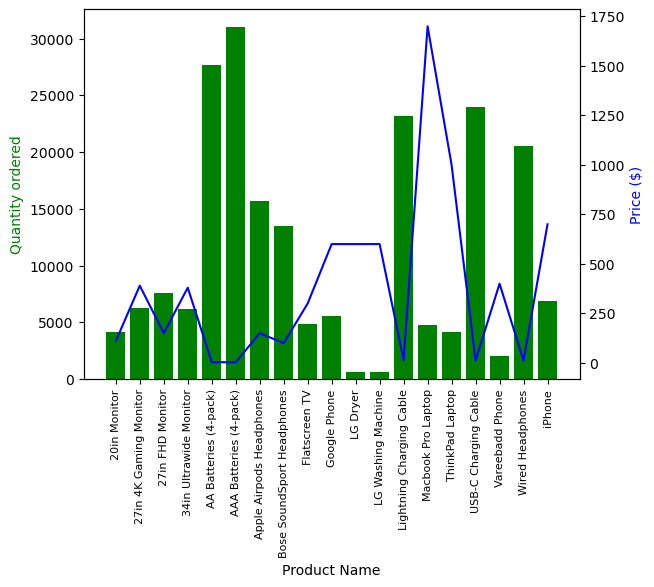

In [55]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
# ax2.plot(products,prices,"b-")
ax2.plot(products, prices["Price Each"], color='b', label='Mean Price')
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity ordered"
               ,color="g")
ax2.set_ylabel("Price ($)",color="b")
ax1.set_xticklabels(products,rotation=90,size=8)
plt.show()